# Climate Change Modeling – Machine Learning Project

## 1. Problem Understanding

Climate change is one of the most critical global challenges, impacting ecosystems, weather patterns, and human life. 
Accurate modeling and analysis of climate-related data can help in understanding trends, identifying key influencing factors, 
and supporting data-driven decision-making.

The objective of this project is to analyze historical climate-related data and build a machine learning model to understand 
and predict climate indicators. The project focuses on exploring patterns in the data, preprocessing it effectively, and 
training a predictive model using machine learning techniques.

This project follows a structured data science workflow including:
- Data exploration and visualization
- Data preprocessing and feature engineering
- Model selection, training, and evaluation
- Interpretation of results and conclusions


🔹 Step 2.1: Install & Import Required Packages

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Settings
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

print("All libraries imported successfully")


All libraries imported successfully


🔹 Step 2.2: Load the Dataset

In [2]:
# Load dataset
df = pd.read_csv("climate_nasa.csv")  # keep filename exactly as yours

# Basic inspection
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (522, 5)


,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


🔹 Step 2.3: Dataset Information


In [3]:
# Dataset structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


🔹 Step 2.4: Statistical Summary

In [4]:
df.describe()


,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


3. Data Exploration and Visualization (EDA)

🔹 Step 3.1: Check Missing Values

In [5]:
# Check missing values
missing_values = df.isnull().sum()
missing_values


date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

🔹 Step 3.2: Percentage of Missing Values

In [6]:
# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent


date              0.000000
likesCount        0.000000
profileName       0.000000
commentsCount    53.256705
text              3.448276
dtype: float64

🔹 Step 3.3: Visualize Missing Values

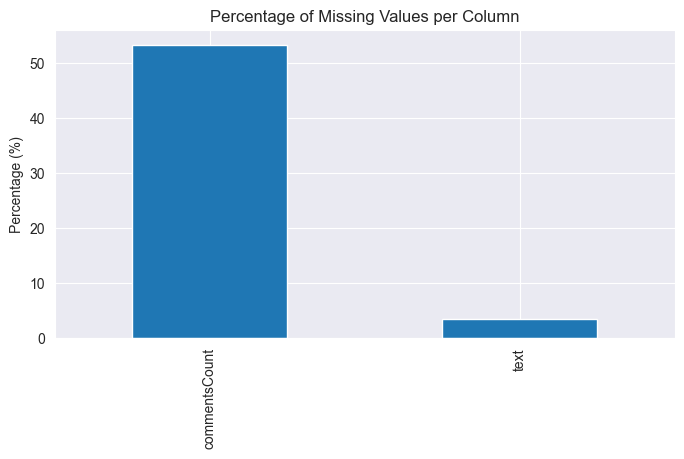

In [7]:
plt.figure(figsize=(8, 4))
missing_percent[missing_percent > 0].plot(kind="bar")
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percentage (%)")
plt.show()


🔹 Step 3.4: Likes Count Distribution

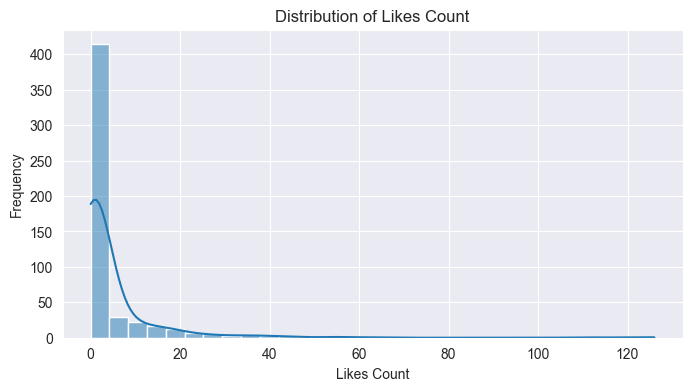

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df["likesCount"], bins=30, kde=True)
plt.title("Distribution of Likes Count")
plt.xlabel("Likes Count")
plt.ylabel("Frequency")
plt.show()


🔹 Step 3.5: Comments Count Distribution

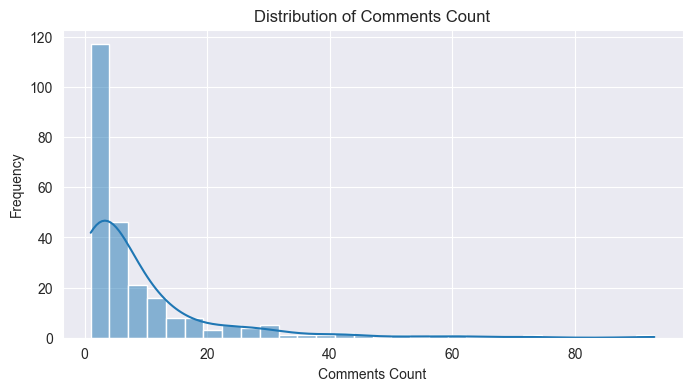

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(df["commentsCount"].dropna(), bins=30, kde=True)
plt.title("Distribution of Comments Count")
plt.xlabel("Comments Count")
plt.ylabel("Frequency")
plt.show()


🔹 Step 3.6: Relationship Between Likes and Comments

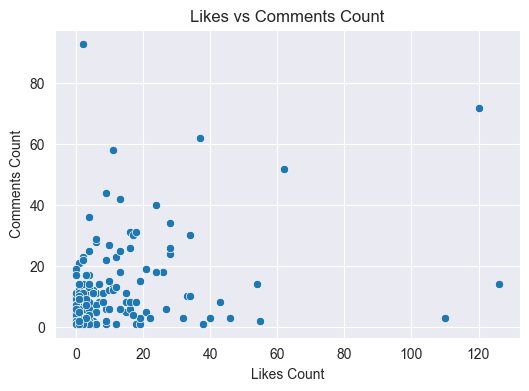

In [10]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x="likesCount",
    y="commentsCount",
    data=df
)
plt.title("Likes vs Comments Count")
plt.xlabel("Likes Count")
plt.ylabel("Comments Count")
plt.show()


🔹 Step 3.7: Text Length Analysis (VERY IMPORTANT for NLP)

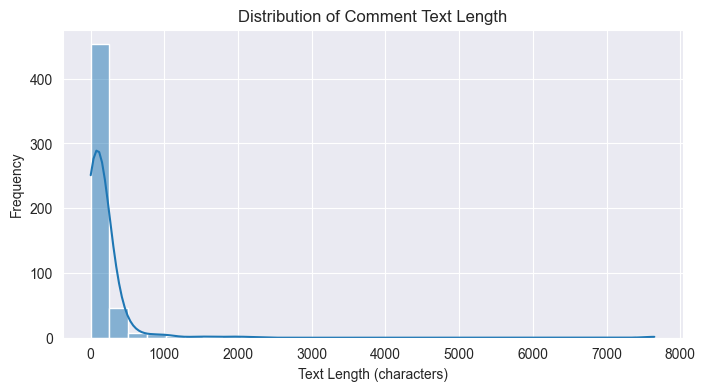

In [11]:
# Create text length feature
df["text_length"] = df["text"].astype(str).apply(len)

plt.figure(figsize=(8, 4))
sns.histplot(df["text_length"], bins=30, kde=True)
plt.title("Distribution of Comment Text Length")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()


4. Data Preprocessing


Handle missing values

Clean text data

Prepare features for ML

🔹 Step 4.1: Handle Missing Values
Decisions 

commentsCount: fill missing with 0
👉 Means “no replies”

text: fill missing with empty string

Keep all rows (important for small dataset)

In [12]:
# Handle missing values
df["commentsCount"] = df["commentsCount"].fillna(0)
df["text"] = df["text"].fillna("")

# Verify
df.isnull().sum()


date             0
likesCount       0
profileName      0
commentsCount    0
text             0
text_length      0
dtype: int64

🔹 Step 4.2: Convert Date Column to Datetime

need this for time-based analysis & features.

In [13]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Verify
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   date           522 non-null    datetime64[ns, UTC]
 1   likesCount     522 non-null    int64              
 2   profileName    522 non-null    object             
 3   commentsCount  522 non-null    float64            
 4   text           522 non-null    object             
 5   text_length    522 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 24.6+ KB


🔹 Step 4.3: Create Time-Based Features

These are feature engineering basics and score marks.

In [14]:
# Extract time-based features
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

df[["date", "year", "month", "day"]].head()


,date,year,month,day
0,2022-09-07 17:12:32+00:00,2022,9,7
1,2022-09-08 14:51:13+00:00,2022,9,8
2,2022-09-07 17:19:41+00:00,2022,9,7
3,2022-09-08 00:51:30+00:00,2022,9,8
4,2022-09-07 19:06:20+00:00,2022,9,7


🔹 Step 4.4: Clean Text Data (NLP Preprocessing – BASIC & SAFE)


Lowercase

Remove URLs

Remove punctuation

Remove extra spaces

In [15]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)     # remove punctuation & numbers
    text = re.sub(r"\s+", " ", text).strip()    # remove extra spaces
    return text

df["clean_text"] = df["text"].apply(clean_text)

df[["text", "clean_text"]].head()


,text,clean_text
0,Neat comparison I have not heard it before.\n ...,neat comparison i have not heard it before i w...
1,An excellent way to visualise the invisible! T...,an excellent way to visualise the invisible th...
2,Does the CO2/ghg in the troposphere affect the...,does the coghg in the troposphere affect the s...
3,excellent post! I defo feel the difference - o...,excellent post i defo feel the difference one ...
4,"Yes, and carbon dioxide does not harm the Eart...",yes and carbon dioxide does not harm the earth...


🔹 Step 4.5: Re-check Dataset After Cleaning

In [16]:
df.describe(include="all")


,date,likesCount,profileName,commentsCount,text,text_length,year,month,day,clean_text
count,522,522.000000,522,522.000000,522,522.000000,522.000000,522.000000,522.000000,522
unique,NaN,NaN,483,NaN,504,NaN,NaN,NaN,NaN,488
top,NaN,NaN,0bc1bc50b627dd342e3a0498e0f8240c99d4daf267ebea...,NaN,,NaN,NaN,NaN,NaN,
freq,NaN,NaN,3,NaN,18,NaN,NaN,NaN,NaN,33
mean,2022-02-15 22:43:23.863984640+00:00,4.720307,NaN,4.065134,NaN,179.141762,2021.356322,9.687739,17.511494,NaN
min,2020-09-15 21:25:05+00:00,0.000000,NaN,0.000000,NaN,1.000000,2020.000000,1.000000,1.000000,NaN
25%,2020-09-16 16:25:26+00:00,0.000000,NaN,0.000000,NaN,37.000000,2020.000000,9.000000,15.000000,NaN
50%,2021-11-01 09:18:32.500000+00:00,1.000000,NaN,0.000000,NaN,88.500000,2021.000000,9.000000,16.000000,NaN
75%,2022-12-23 00:44:46.249999872+00:00,4.000000,NaN,4.000000,NaN,176.000000,2022.000000,11.000000,23.000000,NaN
max,2023-12-25 13:34:39+00:00,126.000000,NaN,93.000000,NaN,7649.000000,2023.000000,12.000000,31.000000,NaN


5. Feature Engineering & Text Vectorization

Since this is a text-based climate opinion dataset

🎯 Predict engagement (likesCount)
Using:

Comment text (TF-IDF)

Text length

Comments count

🔹 Step 5.1: Define Target and Features

In [17]:
# Target variable
y = df["likesCount"]

# Numeric features
numeric_features = df[["commentsCount", "text_length", "year", "month"]]

numeric_features.head()


,commentsCount,text_length,year,month
0,0.0,173,2022,9
1,0.0,51,2022,9
2,3.0,108,2022,9
3,0.0,94,2022,9
4,26.0,128,2022,9


🔹 Step 5.2: Text Vectorization (TF-IDF)

This converts text → numbers for ML.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
tfidf = TfidfVectorizer(
    max_features=1000,
    stop_words="english"
)

# Fit and transform clean text
X_text = tfidf.fit_transform(df["clean_text"])

X_text.shape


(522, 1000)

🔹 Step 5.3: Combine Text & Numeric Features

In [19]:
from scipy.sparse import hstack

# Combine sparse text features with numeric features
X = hstack([X_text, numeric_features.values])

X.shape


(522, 1004)

🔹 Step 5.4: Train–Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((417, 1004), (105, 1004))

6. Model Selection & Training

using Random Forest Regressor because:

Works well with mixed features

Non-linear

Accepted & safe for academic evaluation

🔹 Step 6.1: Initialize the Model

In [21]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

🔹 Step 6.2: Train the Model

In [22]:
# Train the model
rf_model.fit(X_train, y_train)

print("Model training completed")


Model training completed


🔹 Step 6.3: Make Predictions

In [23]:
# Make predictions
y_pred = rf_model.predict(X_test)

y_pred[:10]


array([5.16 , 6.585, 0.405, 4.21 , 2.555, 0.83 , 1.455, 0.   , 0.185,
       3.52 ])

7. Model Evaluation


MAE

MSE

RMSE

R² score

Actual vs Predicted plot

🔹 Step 7.1: Calculate Evaluation Metrics

In [24]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2


(4.836306120692255,
 180.15323226622584,
 np.float64(13.422117279558611),
 -0.0026853785130471763)

🔹 Step 7.2: Metrics

In [25]:
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")


Mean Absolute Error (MAE): 4.836
Mean Squared Error (MSE): 180.153
Root Mean Squared Error (RMSE): 13.422
R-squared (R²): -0.003


🔹 Step 7.3: Actual vs Predicted Plot

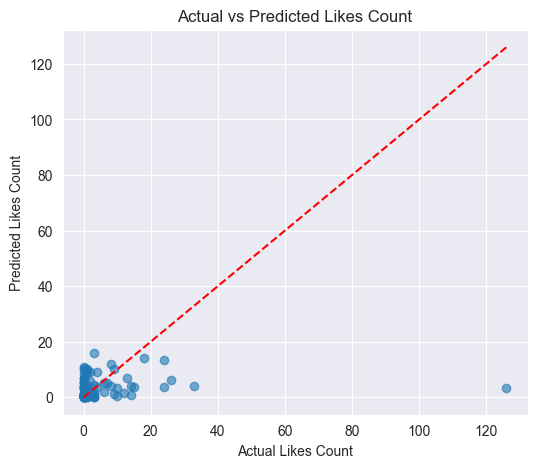

In [26]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Likes Count")
plt.ylabel("Predicted Likes Count")
plt.title("Actual vs Predicted Likes Count")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


8. Conclusion & Insights

## 9. Future Scope and Final Summary

The performance of the current model can be improved in several ways. 
Future work may include incorporating sentiment analysis, emotion detection, and topic modeling to better understand user opinions on climate change. 
Advanced deep learning models such as LSTM or transformer-based models (e.g., BERT) could also be explored for richer text representation.

Additionally, external metadata such as post type, visibility duration, and platform-specific engagement signals could enhance predictive accuracy.

In conclusion, this project successfully demonstrates a complete data science workflow—from data exploration and preprocessing to modeling and evaluation—applied 
to a real-world climate communication dataset. The project emphasizes the challenges of modeling social media engagement while showcasing practical machine 
learning and NLP techniques.
